# Cena com Robô Pioneer 3DX, Móveis e Pessoas: Sistemas de Coordenadas

### Alunos: Alexis Duarte Guimarães Mariz e Davi Fraga Marques Neves

Este notebook cria uma cena simulada com um robô móvel Pioneer 3DX, três móveis e duas pessoas usando a Nova API Remota do CoppeliaSim (ZeroMQ, via coppeliasim_zmqremoteapi_client). Também define sistemas de coordenadas para cada item e mostra algumas transformações entre eles.






### Questão 1. Criação da cena via script(é necessário ajustar a variável coppelia_base_dir).

In [ ]:
# Caminhos dos modelos
#coppelia_base_dir = r'/Users/davifragamarques/Downloads/coppeliaSim 2.app/Contents/Resources'
coppelia_base_dir = r'/home/alexis/apps/CoppeliaSim_Edu_V4_10_0_rev0_Ubuntu22_04'

from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import os, math
import numpy as np
import matplotlib.pyplot as plt

client = RemoteAPIClient()
sim = client.require('sim')

# Garante que a simulação esteja parada
sim.stopSimulation()

# Limpa a cena atual
sim.closeScene()
sim.loadScene('')  # cena vazia

p3dx_path     = os.path.join(coppelia_base_dir, "models/robots/mobile/pioneer p3dx.ttm")
sitting_path  = os.path.join(coppelia_base_dir, "models/people/Sitting Bill.ttm")
standing_path = os.path.join(coppelia_base_dir, "models/people/Standing Bill.ttm")
table_path    = os.path.join(coppelia_base_dir, "models/furniture/tables/diningTable.ttm")
chair_path    = os.path.join(coppelia_base_dir, "models/furniture/chairs/dining chair.ttm")
laptop_path   = os.path.join(coppelia_base_dir, "models/office items/laptop.ttm")
cupboard_path = os.path.join(coppelia_base_dir, "models/furniture/shelves-cupboards-racks/deep cupboard.ttm")
rack_path     = os.path.join(coppelia_base_dir, "models/furniture/shelves-cupboards-racks/rack.ttm")
plant_path    = os.path.join(coppelia_base_dir, "models/furniture/plants/indoorPlant.ttm")
asti_path     = os.path.join(coppelia_base_dir, "models/robots/mobile/Asti.ttm")

# carregar modelos
p3dx_h     = sim.loadModel(p3dx_path)
table_h    = sim.loadModel(table_path)
chair1_h   = sim.loadModel(chair_path)
chair2_h   = sim.loadModel(chair_path)
sitting_h  = sim.loadModel(sitting_path)
standing_h = sim.loadModel(standing_path)
laptop_h   = sim.loadModel(laptop_path)
cupboard_h = sim.loadModel(cupboard_path)
rack_h     = sim.loadModel(rack_path)
plant_h    = sim.loadModel(plant_path)
asti_h     = sim.loadModel(asti_path)

#posições dos objetos
chair1_xy = (2.25, 1.9, 0.45)
chair1_abg = (0.0, 0.0, -90.0)

table_xy = (1.30, 2, 0.375)
table_abg = (0.0, -90.0, 0.0)

char2_xy = (0.275, 1.9,0.45) #Cadeira do Bill sentado
char2_abg = (0.0, 0.0, 90.0)

sitting_bill_xy = (0.675, 1.9, 0.0)
sitting_bill_abg = (0.0, 0.0, 0.0)

standing_bill_xy = (1.45, 1.125, 0.0)
standing_bill_abg = (0.0, 0.0, 130.0)

laptop_xy = (0.75, 1.95, 0.82739)
laptop_abg = (0.0, 50.0, -180.0)

p3dx_xy = (-2.0, -2.0, 0.13879)
p3dx_abg = (0.0, 0.0, 0.0)

cupboard_xy = (-2.0, 1.8, 1.0)
cupboard_abg = (0.0, 0.0, -180.0)

rack_xy = (-2.0, 0.4, 0.85)
rack_abg = (0.0, 0.0, 0.0)

plant_xy = (2.25, -2.25, 0.165)
plant_abg = (0.0, 0.0, 0.0)

asti_xy = (0.1, -1.7, 0.80597)
asti_abg = (180.0, 0.0, -130.0)

# Mesa
sim.setObjectPosition(table_h, -1, [table_xy[0], table_xy[1], table_xy[2]])
sim.setObjectOrientation(table_h, -1, [math.radians(table_abg[0]),math.radians(table_abg[1]),math.radians(table_abg[2])])

# Cadeira 1
sim.setObjectPosition(chair1_h, -1, [chair1_xy[0], chair1_xy[1], chair1_xy[2]])
sim.setObjectOrientation(chair1_h, -1, [math.radians(chair1_abg[0]),math.radians(chair1_abg[1]),math.radians(chair1_abg[2])])

# Cadeira 2 (Bill sentado)
sim.setObjectPosition(chair2_h, -1, [char2_xy[0], char2_xy[1], char2_xy[2]])
sim.setObjectOrientation(chair2_h, -1, [math.radians(char2_abg[0]),math.radians(char2_abg[1]),math.radians(char2_abg[2])])

# Bill sentado
sim.setObjectPosition(sitting_h, -1, [sitting_bill_xy[0], sitting_bill_xy[1], sitting_bill_xy[2]])
sim.setObjectOrientation(sitting_h, -1, [math.radians(sitting_bill_abg[0]),math.radians(sitting_bill_abg[1]),math.radians(sitting_bill_abg[2])])

# Bill de pé
sim.setObjectPosition(standing_h, -1, [standing_bill_xy[0], standing_bill_xy[1], standing_bill_xy[2]])
sim.setObjectOrientation(standing_h, -1, [math.radians(standing_bill_abg[0]),math.radians(standing_bill_abg[1]),math.radians(standing_bill_abg[2])])

# Robô Pioneer 3DX
sim.setObjectPosition(p3dx_h, -1, [p3dx_xy[0], p3dx_xy[1], p3dx_xy[2]])
sim.setObjectOrientation(p3dx_h, -1, [math.radians(p3dx_abg[0]),math.radians(p3dx_abg[1]),math.radians(p3dx_abg[2])])

# Laptop
sim.setObjectPosition(laptop_h, -1, [laptop_xy[0], laptop_xy[1], laptop_xy[2]])
sim.setObjectOrientation(laptop_h, -1, [math.radians(laptop_abg[0]),math.radians(laptop_abg[1]),math.radians(laptop_abg[2])])

# Cupboard
sim.setObjectPosition(cupboard_h, -1, [cupboard_xy[0], cupboard_xy[1], cupboard_xy[2]])
sim.setObjectOrientation(cupboard_h, -1, [math.radians(cupboard_abg[0]),math.radians(cupboard_abg[1]),math.radians(cupboard_abg[2])])

# Rack
sim.setObjectPosition(rack_h, -1, [rack_xy[0], rack_xy[1], rack_xy[2]])
sim.setObjectOrientation(rack_h, -1, [math.radians(rack_abg[0]),math.radians(rack_abg[1]),math.radians(rack_abg[2])])

# Plant
sim.setObjectPosition(plant_h, -1, [plant_xy[0], plant_xy[1], plant_xy[2]])
sim.setObjectOrientation(plant_h, -1, [math.radians(plant_abg[0]),math.radians(plant_abg[1]),math.radians(plant_abg[2])])

# Robô Asti
sim.setObjectPosition(asti_h, -1, [asti_xy[0], asti_xy[1], asti_xy[2]])
sim.setObjectOrientation(asti_h, -1, [math.radians(asti_abg[0]),math.radians(asti_abg[1]),math.radians(asti_abg[2])])


### Questão 2. Adiciona os sistemas de coordenadas em todos os objetos.

In [2]:
from collections import OrderedDict

# Caminho do modelo de referencial
ref_frame_path = os.path.join(coppelia_base_dir, "models/other/reference frame.ttm")

def add_frame_for(obj_h, name, size=0.2, local_offset=(0,0,0), local_euler_deg=(0,0,0)):
    """
    Carrega um 'reference frame', coloca como filho do objeto e o alinha no frame local do objeto.
    Retorna o handle do frame.
    """
    if obj_h is None or obj_h == -1:
        raise RuntimeError(f"Objeto para frame '{name}' inválido")

    fh = sim.loadModel(ref_frame_path)

    # torna o frame filho do objeto para grudar
    sim.setObjectParent(fh, obj_h, True)
    
    # zera pose local e aplica offset/orientação local desejados
    sim.setObjectPosition(fh, obj_h, list(local_offset))
    rx, ry, rz = [math.radians(x) for x in local_euler_deg]
    sim.setObjectOrientation(fh, obj_h, [rx, ry, rz])

    # nome e tamanho (o reference frame respeita objfloatparam_size)
    sim.setObjectAlias(fh, f"frame_{name}")
    try:
        sim.setObjectFloatParam(fh, sim.objfloatparam_size, float(size))
    except Exception:
        pass  # caso a versão não tenha esse param, o tamanho padrão fica

    return fh

# Cria um frame "mundo" apenas como referência (não é necessário carregar modelo):
world_h = -1  # handle do mundo no CoppeliaSim

# Adiciona frames para cada item da sua cena
frames = OrderedDict()
frames['world']        = world_h
frames['p3dx']         = add_frame_for(p3dx_h, 'p3dx', size=0.25)
frames['table']        = add_frame_for(table_h, 'table', size=0.2)
frames['chair1']       = add_frame_for(chair1_h, 'chair1', size=0.18)
frames['chair2']       = add_frame_for(chair2_h, 'chair2', size=0.18)
frames['sittingBill']  = add_frame_for(sitting_h, 'sittingBill', size=0.15, local_offset=(0,0,0.9))
frames['standingBill'] = add_frame_for(standing_h, 'standingBill', size=0.18, local_offset=(0,0,1.0))
frames['laptop']       = add_frame_for(laptop_h, 'laptop', size=0.12)
frames['cupboard']     = add_frame_for(cupboard_h, 'cupboard', size=0.18)
frames['rack']         = add_frame_for(rack_h, 'rack', size=0.18)
frames['plant']        = add_frame_for(plant_h, 'plant', size=0.15)
frames['asti']         = add_frame_for(asti_h, 'asti', size=0.22)

print("[Q2] Frames adicionados e afixados aos elementos.")

[Q2] Frames adicionados e afixados aos elementos.


In [4]:
def mat4_from_sim(obj, rel):
    """
    Retorna matriz 4x4 homogênea de 'obj' em relação a 'rel' (ambos handles).
    """
    M = sim.getObjectMatrix(obj, rel)  # retorna 12 valores (3x4) em ordem linha
    # Converte 3x4 para 4x4 homogênea
    H = [[M[0], M[1], M[2],  M[3]],
         [M[4], M[5], M[6],  M[7]],
         [M[8], M[9], M[10], M[11]],
         [0.0,  0.0,  0.0,   1.0]]
    return H

def euler_deg_from_mat(H):
    """
    Converte rot (3x3) da matriz 4x4 para ângulos de Euler (alpha,beta,gamma) em graus no padrão do CoppeliaSim.
    """
    M = [H[0][0], H[0][1], H[0][2], 0.0,
         H[1][0], H[1][1], H[1][2], 0.0,
         H[2][0], H[2][1], H[2][2], 0.0]
    e = sim.getEulerAnglesFromMatrix(M)  # rad
    return [math.degrees(e[0]), math.degrees(e[1]), math.degrees(e[2])]

def pose_from_H(H):
    tx, ty, tz = H[0][3], H[1][3], H[2][3]
    rdeg = euler_deg_from_mat(H)
    return (tx, ty, tz, rdeg[0], rdeg[1], rdeg[2])

# arestas (origem -> destino) para registrar transformações T_dest^origem
edges = [
    ('world','p3dx'),
    ('world','table'),
    ('world','chair1'),
    ('world','chair2'),
    ('world','standingBill'),
    ('world','sittingBill'),
    ('world','laptop'),
    ('world','asti'),
    ('world','rack'),
    ('world','plant'),
    ('world','cupboard'),
    # relações relativas úteis
    ('table','laptop'),
    ('chair2','sittingBill'),
    ('p3dx','asti'),
]

tf_graph = []
for a,b in edges:
    A = frames[a]
    B = frames[b]
    H = mat4_from_sim(B, A)  # T_B^A
    tx,ty,tz, rx,ry,rz = pose_from_H(H)
    tf_graph.append({
        'from': a,
        'to': b,
        'T': H,
        't': [tx,ty,tz],
        'euler_deg': [rx,ry,rz],
    })

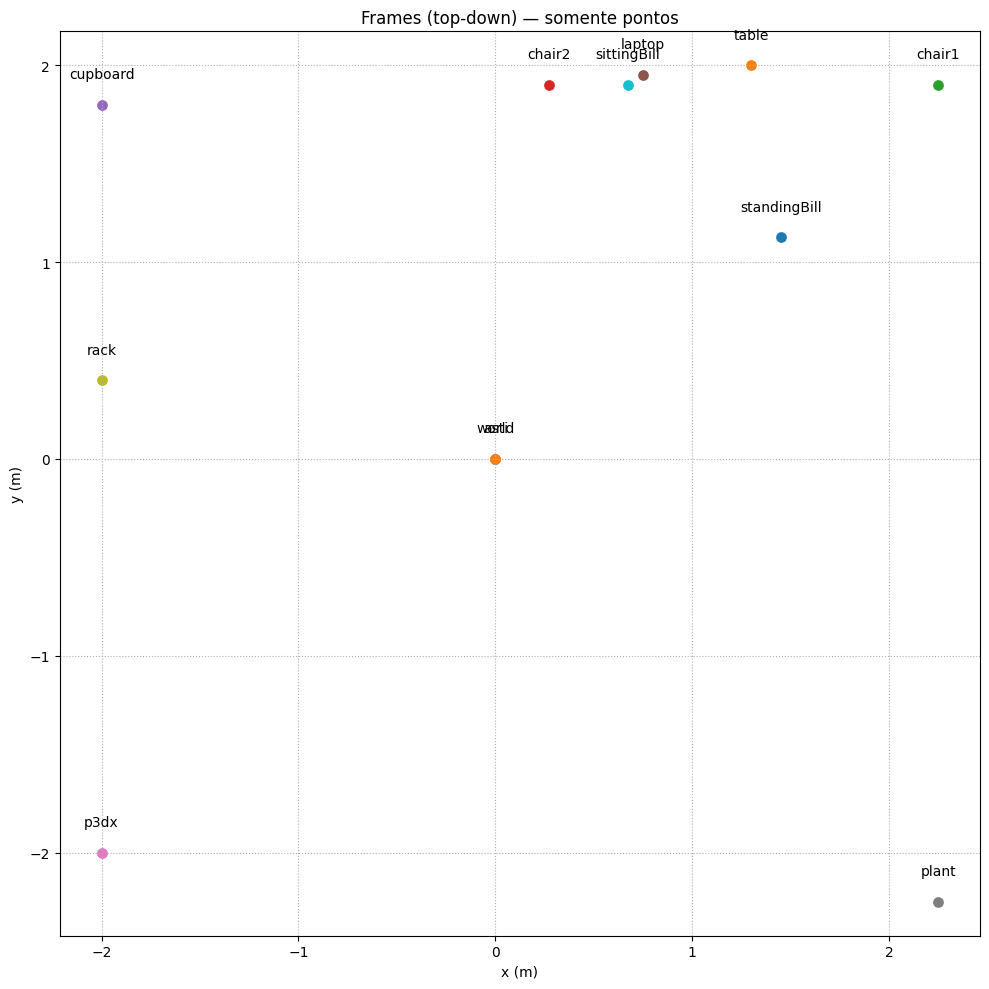

In [5]:
# 1) montar posições reais x–y em relação ao mundo para TODOS os nós
pos = {'world': (0.0, 0.0)}
all_nodes = set()
for e in tf_graph:
    all_nodes.add(e['from'])
    all_nodes.add(e['to'])

for name in sorted(all_nodes):
    if name == 'world':
        continue
    if name not in frames or frames[name] in (None, -1):
        continue
    H = mat4_from_sim(frames[name], frames['world'])  # ^world T_name
    tx, ty, tz, *_ = pose_from_H(H)
    pos[name] = (tx, ty)

# 2) desenhar apenas os pontos com rótulos
plt.figure(figsize=(10,10))

# desenha cada nó
for name, (x, y) in pos.items():
    plt.scatter([x], [y], s=45)
    plt.text(x, y+0.12, name, ha='center', va='bottom')

# ajustes visuais
plt.axis('equal')
plt.grid(True, linestyle=':')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Frames (top-down) — somente pontos')
plt.tight_layout()
plt.show()

Daqui pra baixo não sei se tá certo

In [ ]:
# Função para obter handle de um objeto (Nova API)
def get_handle(name):
    return sim.getObject(name)

# Handles dos objetos
h_pioneer = get_handle('/Pioneer_p3dx')
h_movel1 = get_handle('/Cuboid')
h_movel2 = get_handle('/Cuboid#0')
h_movel3 = get_handle('/Cuboid#1')
h_pessoa1 = get_handle('/Bill')
h_pessoa2 = get_handle('/Bill#0')

In [ ]:
# Criação de um dummy para cada frame
def criar_dummy(nome, cor=[1,0,0]):
    dummy = sim.createDummy(0.05)
    sim.setObjectName(dummy, nome)
    sim.setShapeColor(dummy, None, sim.colorcomponent_ambient_diffuse, cor)
    return dummy

# Associando dummies aos objetos
frames = {}
for (name, handle, cor) in [
    ('frame_pioneer', h_pioneer, [1,0,0]),
    ('frame_movel1', h_movel1, [0,1,0]),
    ('frame_movel2', h_movel2, [0,0,1]),
    ('frame_movel3', h_movel3, [1,1,0]),
    ('frame_pessoa1', h_pessoa1, [1,0,1]),
    ('frame_pessoa2', h_pessoa2, [0,1,1]),
]:
    dummy = criar_dummy(name, cor)
    sim.setObjectParent(dummy, handle, True)
    frames[name] = dummy

In [ ]:
# Função para obter posição e orientação absoluta de um frame (Nova API)
def get_pose(handle):
    pos = sim.getObjectPosition(handle, -1)
    euler = sim.getObjectOrientation(handle, -1)
    return np.array(pos), np.array(euler)

for name, dummy in frames.items():
    pos, euler = get_pose(dummy)
    print(f'{name}: posição = {pos}, orientação (Euler) = {euler}')

In [ ]:
# Exemplo: transformação homogênea do frame do Pioneer para o frame do móvel 1 
def get_transform(parent, child):
    matrix = sim.getObjectMatrix(child, parent)
    matrix = np.array(matrix).reshape((3,4))
    homog = np.vstack([matrix, [0,0,0,1]])
    return homog

T_pioneer_movel1 = get_transform(frames['frame_pioneer'], frames['frame_movel1'])
print('Transformação homogênea Pioneer->Movel1:')
print(T_pioneer_movel1)

### transformação homogênea

In [ ]:
def homog_2d(x, y, theta):
    """
    Retorna matriz homogênea 3x3 para pose 2D.
    """
    c, s = np.cos(theta), np.sin(theta)
    return np.array([[c, -s, x],
                     [s,  c, y],
                     [0,  0, 1]])

### pos global dos objetos

In [ ]:
# Suponha que handles e nomes estejam definidos (veja células anteriores)
def get_pose_2d(handle):
    pos = sim.getObjectPosition(handle, -1)
    euler = sim.getObjectOrientation(handle, -1)
    return np.array([pos[0], pos[1], euler[2]])

poses_global = {}
names_handles = {
    'robô': h_pioneer,
    'móvel 1': h_movel1,
    'móvel 2': h_movel2,
    'móvel 3': h_movel3,
    'pessoa 1': h_pessoa1,
    'pessoa 2': h_pessoa2
}
for nome, handle in names_handles.items():
    poses_global[nome] = get_pose_2d(handle)
    
print(poses_global)

### Matrizes homogêneas de cada elemento no frame do robô

In [ ]:
# Pose global do robô
q = poses_global['robô'] # [x, y, theta]
T_gr = homog_2d(q[0], q[1], q[2])    # Global->Robô
T_rg = np.linalg.inv(T_gr)           # Robô->Global (inversa)

# Para cada elemento, calcule a matriz homogênea no frame do robô
T_robos = {}
for nome, pose in poses_global.items():
    if nome == 'robô':
        continue
    T_gi = homog_2d(pose[0], pose[1], pose[2])   # Global->item
    T_ri = np.dot(T_rg, T_gi)                    # Robô->item = (Robô->Global)^-1 * (Global->item)
    T_robos[nome] = T_ri

for nome, T in T_robos.items():
    print(f'Transformação homogênea {nome} no frame do robô:\n', T)

## Plotar os referenciais e os vetores entre eles

In [ ]:
import matplotlib.pyplot as plt

def plot_frame(T, label, color='k'):
    origin = T[:2, 2]
    x_axis = origin + T[:2, 0]*0.2
    y_axis = origin + T[:2, 1]*0.2
    plt.plot([origin[0], x_axis[0]], [origin[1], x_axis[1]], color+'-', lw=2)
    plt.plot([origin[0], y_axis[0]], [origin[1], y_axis[1]], color+'--', lw=2)
    plt.text(origin[0], origin[1], label)

# Plote o frame do robô na origem
plt.figure(figsize=(8,8))
plot_frame(np.eye(3), 'robô', 'r')

cores = ['g', 'b', 'm', 'c', 'y']
for i, (nome, T) in enumerate(T_robos.items()):
    plot_frame(T, nome, cores[i % len(cores)])
    plt.arrow(0, 0, T[0,2], T[1,2], head_width=0.05, head_length=0.1, fc=cores[i % len(cores)], ec=cores[i % len(cores)], alpha=0.5)

plt.xlabel('x (robô)')
plt.ylabel('y (robô)')
plt.axis('equal')
plt.grid()
plt.title('Referenciais dos objetos no frame do robô')
plt.show()


### exercicio 4: colocar o robo em pos diferentes

In [ ]:
# Lista de poses do robô: [x, y, theta]
poses_robo = [
    [0.0, 0.0, 0.0],          # Posição original (de frente)
    [1.0, 0.0, np.pi/2],      # À direita, olhando para cima
    [0.0, -1.0, np.pi],       # Abaixo, olhando para trás
    [-1.0, 1.0, -np.pi/2]     # Esquerda cima, olhando para baixo
]

### Função para recalcular e plotar para cada pose

In [ ]:
def plot_cena_para_pose_robo(q, poses_global, nomes_ordenados=None):
    T_gr = homog_2d(q[0], q[1], q[2])  # Global->Robô
    T_rg = np.linalg.inv(T_gr)         # Robô->Global (inversa)
    T_robos = {}
    for nome, pose in poses_global.items():
        if nome == 'robô':
            continue
        T_gi = homog_2d(pose[0], pose[1], pose[2])   # Global->item
        T_ri = np.dot(T_rg, T_gi)                    # Robô->item
        T_robos[nome] = T_ri

    plt.figure(figsize=(8,8))
    plot_frame(np.eye(3), 'robô', 'r')
    cores = ['g', 'b', 'm', 'c', 'y']
    if nomes_ordenados is None:
        nomes_ordenados = list(T_robos.keys())
    for i, nome in enumerate(nomes_ordenados):
        T = T_robos[nome]
        plot_frame(T, nome, cores[i % len(cores)])
        plt.arrow(0, 0, T[0,2], T[1,2], head_width=0.05, head_length=0.1, 
                  fc=cores[i % len(cores)], ec=cores[i % len(cores)], alpha=0.6, length_includes_head=True)

    plt.xlabel('x (robô)')
    plt.ylabel('y (robô)')
    plt.axis('equal')
    plt.grid(True)
    plt.title(f'Referenciais no frame do robô\n(q = [{q[0]:.2f}, {q[1]:.2f}, {np.degrees(q[2]):.1f}°])')
    plt.show()

## plotar novamente

In [ ]:
nomes_ordenados = ['móvel 1', 'móvel 2', 'móvel 3', 'pessoa 1', 'pessoa 2']

for q in poses_robo:
    plot_cena_para_pose_robo(q, poses_global, nomes_ordenados)

### Encerrar a simluacao no final (nao rodar tudo pra nao rodar essa parte)



In [ ]:
sim.stopSimulation()